In [3]:
import pandas as pd
import scipy.stats as stats

# Load the dataset and create a DataFrame
df = pd.read_csv('insurance.csv')

# Display the data
print(df)


      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]


In [4]:
df.info() # take a look at what is in the data set 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# Check for missing values in the entire DataFrame
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [10]:

# Assuming your DataFrame is named 'df' and the smoker column is named 'smoker'
smoker_counts = df['smoker'].value_counts()

print(smoker_counts)


no     1064
yes     274
Name: smoker, dtype: int64


In [12]:
from scipy import stats

# Separate the data for smokers and non-smokers
expenses_smokers = df[df['smoker'] == 'yes']['expenses']
expenses_non_smokers = df[df['smoker'] == 'no']['expenses']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(expenses_smokers, expenses_non_smokers)

# Check the p-value to determine statistical significance
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("There is a statistically significant difference between smokers and non-smokers in insurance expenses.")
else:
    print("There is no statistically significant difference between smokers and non-smokers in insurance expenses.")


There is a statistically significant difference between smokers and non-smokers in insurance expenses.


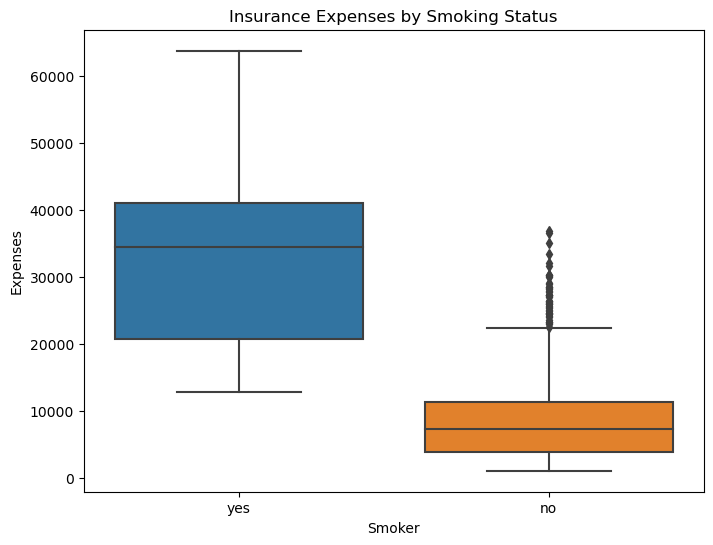

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the data for smokers and non-smokers
expenses_smokers = df[df['smoker'] == 'yes']['expenses']
expenses_non_smokers = df[df['smoker'] == 'no']['expenses']

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='expenses', data=df)
plt.title('Insurance Expenses by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Expenses')
plt.show()


In [2]:
# Assuming 'df' is my DataFrame
# Calculate the mean insurance expenses for smokers
mean_expenses_smokers = df[df['smoker'] == 'yes']['expenses'].mean()

# Calculate the mean insurance expenses for non-smokers
mean_expenses_non_smokers = df[df['smoker'] == 'no']['expenses'].mean()

print("Mean Expenses for Smokers:", mean_expenses_smokers)
print("Mean Expenses for Non-Smokers:", mean_expenses_non_smokers)

Mean Expenses for Smokers: 32050.23197080292
Mean Expenses for Non-Smokers: 8434.268449248118


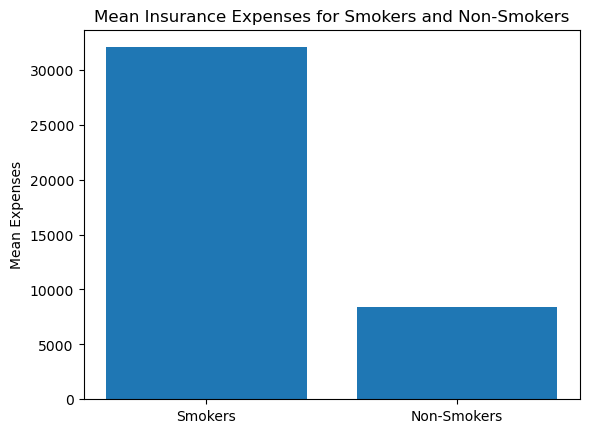

In [24]:
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

# Calculate the mean insurance expenses for smokers and non-smokers
mean_expenses_smokers = df[df['smoker'] == 'yes']['expenses'].mean()
mean_expenses_non_smokers = df[df['smoker'] == 'no']['expenses'].mean()

# Create a bar plot
plt.bar(['Smokers', 'Non-Smokers'], [mean_expenses_smokers, mean_expenses_non_smokers])
plt.ylabel('Mean Expenses')
plt.title('Mean Insurance Expenses for Smokers and Non-Smokers')
plt.show()


In [27]:
from scipy import stats

# Sample data
expenses_smokers = df[df['smoker'] == 'yes']['expenses']
expenses_non_smokers = df[df['smoker'] == 'no']['expenses']

# Perform a t-test
t_stat, p_value = stats.ttest_ind(expenses_smokers, expenses_non_smokers)

if p_value < 0.05:
    print("Reject the null hypothesis: Smoking status significantly affects insurance expenses.")
else:
    print("Fail to reject the null hypothesis: Smoking status does not significantly affect insurance expenses.")


Reject the null hypothesis: Smoking status significantly affects insurance expenses.
